In [3]:
import pandas as pd
import scipy.stats as stats
df_fraud = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
df_fraud.head(3)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

### 가설 설정
- 귀무가설 : 시간대별 평균 거래 금액에는 차이가 없다.
- 대립가설 : 특정 시간대의 평균 거래 금액이 다른 시간대와 차이가 있다. // 점심 저녁시간에 거래금액 차이가 날것같음



In [6]:
# 시간대별 거래량 및 금액 합계
df_fraud['Hour'] = df_fraud['TransactionDate']

In [7]:
# 시간대별 거래량
hourly_transactions = df_fraud.groupby('Hour')['TransactionID'].count()


In [8]:
# 시간대별 거래 금액 합계
hourly_amount = df_fraud.groupby('Hour')['Amount'].sum()


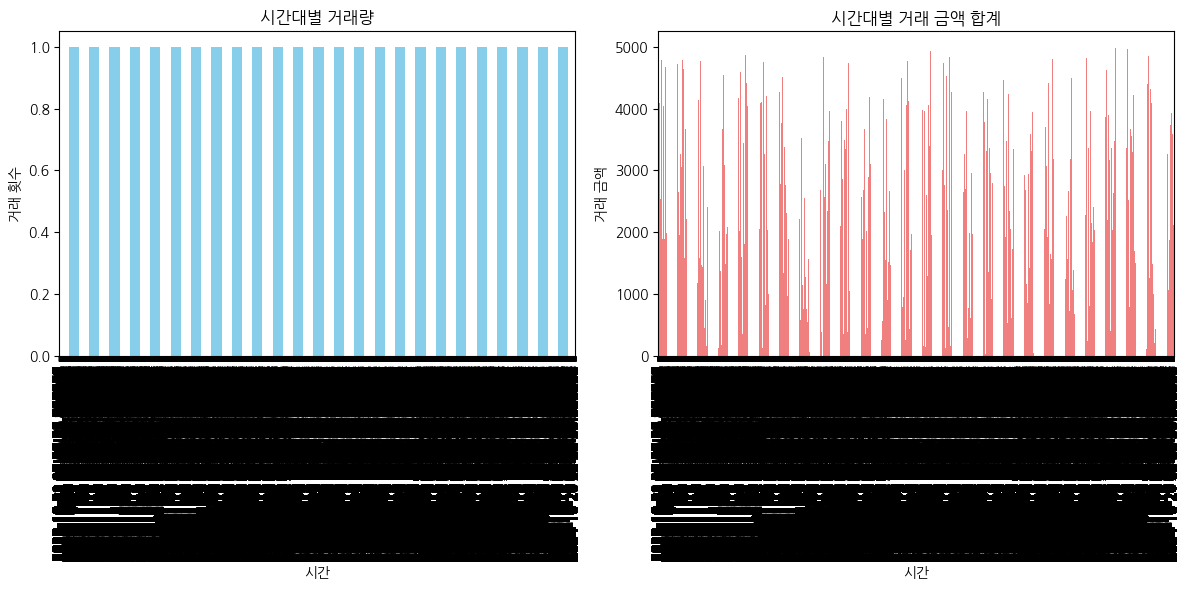

In [9]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
hourly_transactions.plot(kind='bar', color='skyblue')
plt.title('시간대별 거래량')
plt.xlabel('시간')
plt.ylabel('거래 횟수')

plt.subplot(1, 2, 2)
hourly_amount.plot(kind='bar', color='lightcoral')
plt.title('시간대별 거래 금액 합계')
plt.xlabel('시간')
plt.ylabel('거래 금액')

plt.tight_layout()
plt.show()

시각화 겁나 오래걸린다.. 시간을 범주화..

In [12]:
# 'TransactionDate' 컬럼을 datetime 형식으로 변환
df_fraud['TransactionDate'] = pd.to_datetime(df_fraud['TransactionDate'])

# 시간대 범주화
df_fraud['TimeCategory'] = pd.cut(df_fraud['TransactionDate'].dt.hour, bins=[-1, 5, 11, 17, 23], 
                                  labels=['새벽', '오전', '오후', '저녁'])


In [14]:
# 'TransactionDate' 컬럼이 이미 datetime 형식이라고 가정
df_fraud['Hour'] = df_fraud['TransactionDate'].dt.hour

# 시간대 범주화
df_fraud['TimeCategory'] = pd.cut(df_fraud['Hour'], bins=[-1, 5, 11, 17, 23], 
                                  labels=['새벽', '오전', '오후', '저녁'])

# 결과 확인
df_fraud[['TransactionDate', 'Hour', 'TimeCategory']].head()



,TransactionDate,Hour,TimeCategory
0,2024-04-03 14:15:35.462794,14,오후
1,2024-03-19 13:20:35.462824,13,오후
2,2024-01-08 10:08:35.462834,10,오전
3,2024-04-13 23:50:35.462850,23,저녁
4,2024-07-12 18:51:35.462858,18,저녁


/tmp/ipykernel_72896/3939590740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_category_sum = df_fraud.groupby('TimeCategory')['Amount'].sum()


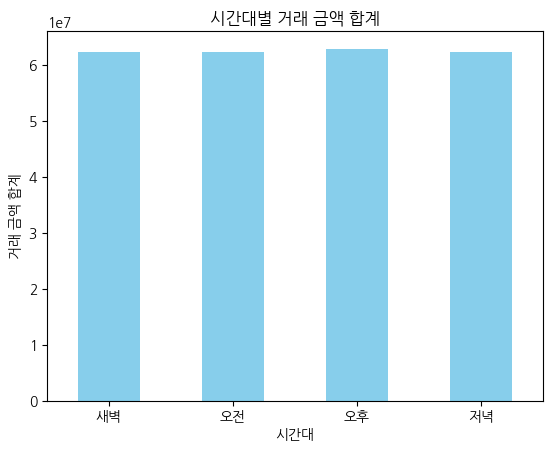

In [15]:
# 시간대별 거래 금액 합계 계산
time_category_sum = df_fraud.groupby('TimeCategory')['Amount'].sum()

# 시각화
import matplotlib.pyplot as plt

time_category_sum.plot(kind='bar', color='skyblue')
plt.title('시간대별 거래 금액 합계')
plt.xlabel('시간대')
plt.ylabel('거래 금액 합계')
plt.xticks(rotation=0)
plt.show()


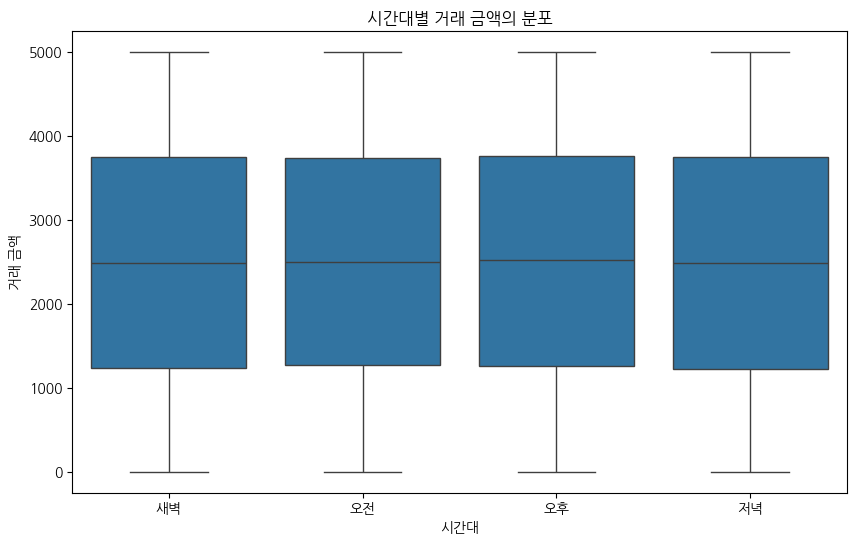

In [23]:

# 시간대별 박스플롯
plt.figure(figsize=(10,6))
sns.boxplot(x='TimeCategory', y='Amount', data=df_fraud)
plt.title('시간대별 거래 금액의 분포')
plt.xlabel('시간대')
plt.ylabel('거래 금액')
plt.show()

/tmp/ipykernel_72896/1394490156.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_category_sum = df_fraud.groupby('TimeCategory')['Amount'].sum()


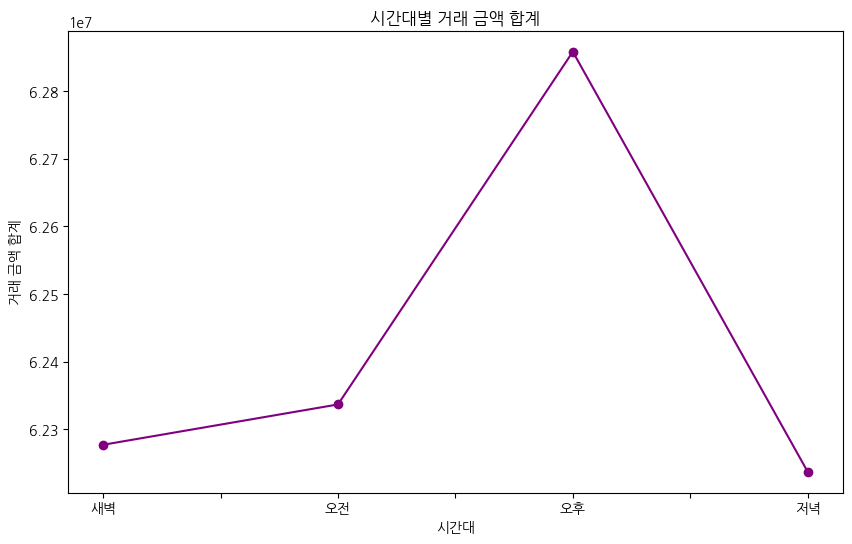

In [24]:
# 시간대별 거래 금액 합계 계산
time_category_sum = df_fraud.groupby('TimeCategory')['Amount'].sum()

# 선 그래프 시각화
plt.figure(figsize=(10,6))
time_category_sum.plot(kind='line', marker='o', color='purple')
plt.title('시간대별 거래 금액 합계')
plt.xlabel('시간대')
plt.ylabel('거래 금액 합계')
plt.xticks(rotation=0)
plt.show()


In [16]:
# '새벽'과 '오후' 거래 금액을 비교하는 t-검정
early_morning = df_fraud[df_fraud['TimeCategory'] == '새벽']['Amount']
afternoon = df_fraud[df_fraud['TimeCategory'] == '오후']['Amount']

# t-검정
t_statistic, p_value = stats.ttest_ind(early_morning, afternoon)

# 결과 출력
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

# p-value에 따른 귀무가설 판단
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: '새벽'과 '오후' 거래 금액에 차이가 있습니다.")
else:
    print("귀무가설 채택: '새벽'과 '오후' 거래 금액에 차이가 없습니다.")

t-statistic: -1.0938710855865643, p-value: 0.2740167866699585
귀무가설 채택: '새벽'과 '오후' 거래 금액에 차이가 없습니다.


시간대별 거래금액 합계가 약간 차이나긴 하나 대립가설을 증명할 만한 수치는 아닌듯함..

### 지역별 자주 발생하는 거래유형 분석
- 귀무가설 : 각 지역에서 발생하는 거래 유형은 지역마다 차이가 없다.
- 대립가설 : 각 지역에서 발생하는 거래 유형은 지역마다 차이가 있을것이다.

In [25]:
# 지역별 거래 유형 빈도 계산
location_transaction_type = df_fraud.groupby(['Location', 'TransactionType']).size().unstack()

# 결과 출력
print(location_transaction_type)


TransactionType  purchase  refund
Location                         
Chicago              5026    5167
Dallas               5066    5010
Houston              4995    4996
Los Angeles          4878    5058
New York             4984    5009
Philadelphia         5011    4862
Phoenix              4929    5031
San Antonio          5057    5005
San Diego            5015    5096
San Jose             4908    4897


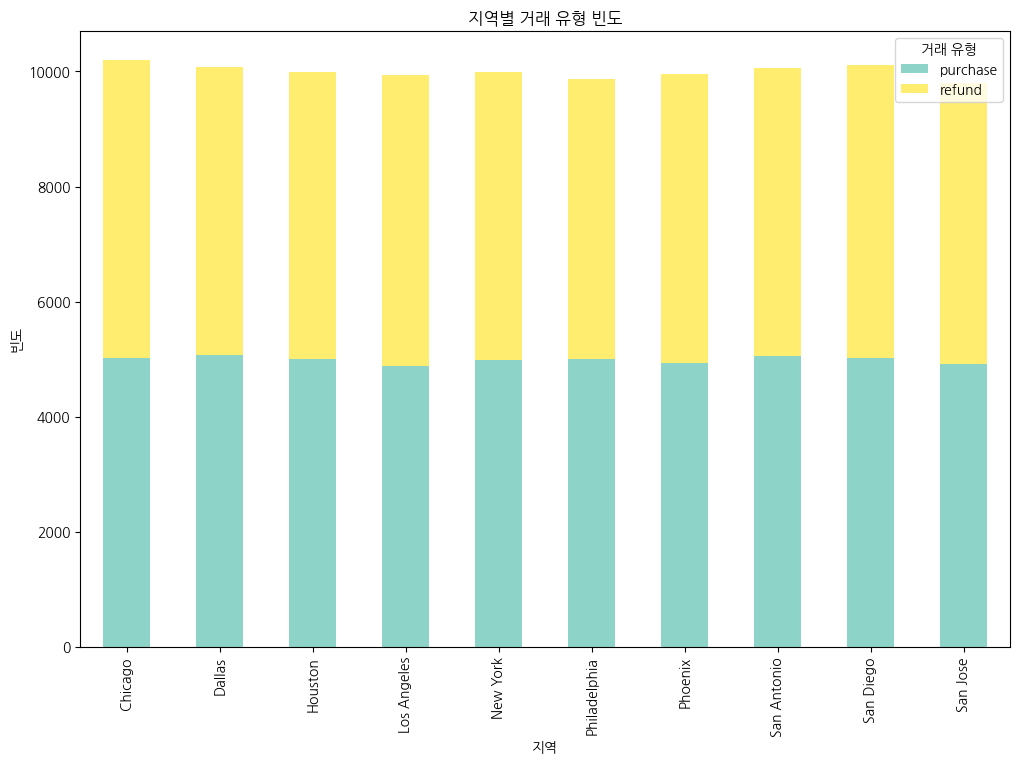

In [26]:
# 지역별 거래 유형 시각화 (막대 그래프)
location_transaction_type.plot(kind='bar', stacked=True, figsize=(12,8), colormap='Set3')

plt.title('지역별 거래 유형 빈도')
plt.xlabel('지역')
plt.ylabel('빈도')
plt.xticks(rotation=90)
plt.legend(title='거래 유형')
plt.show()


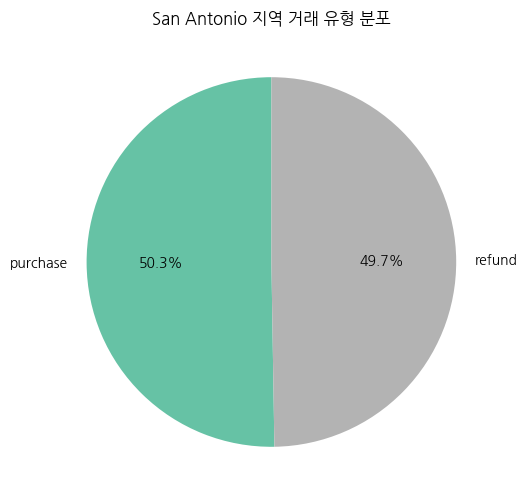

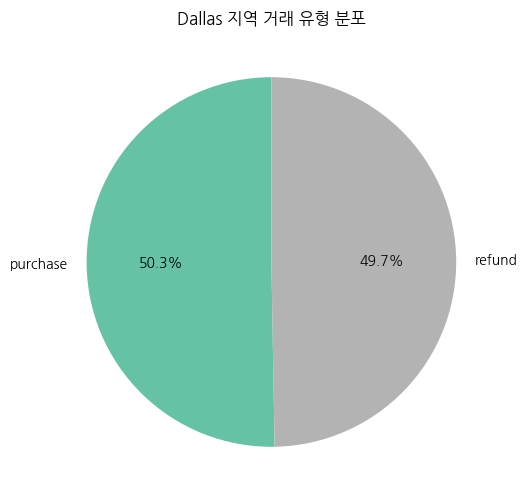

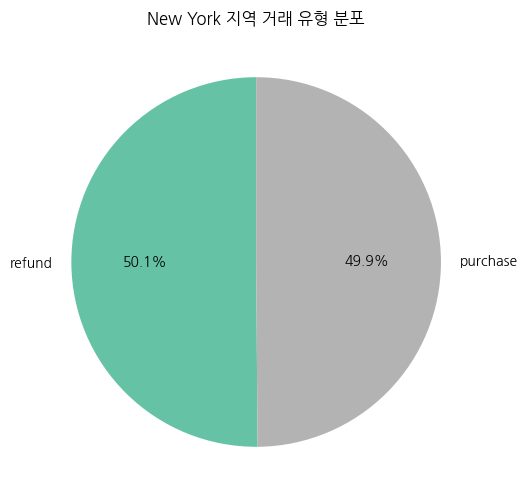

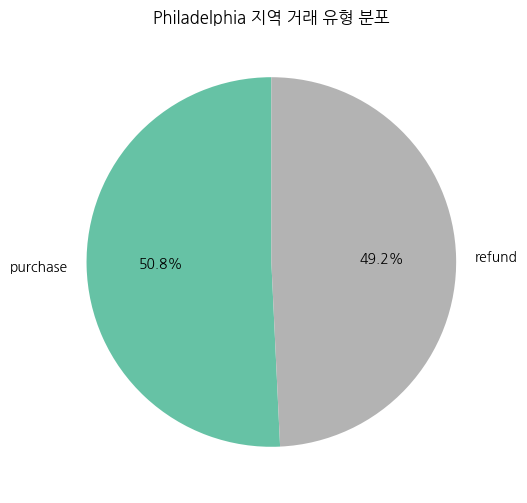

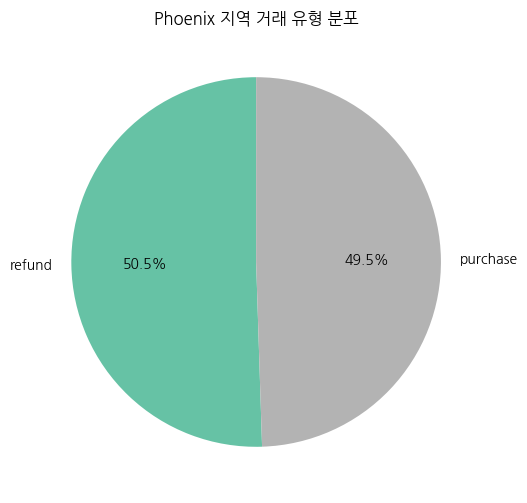

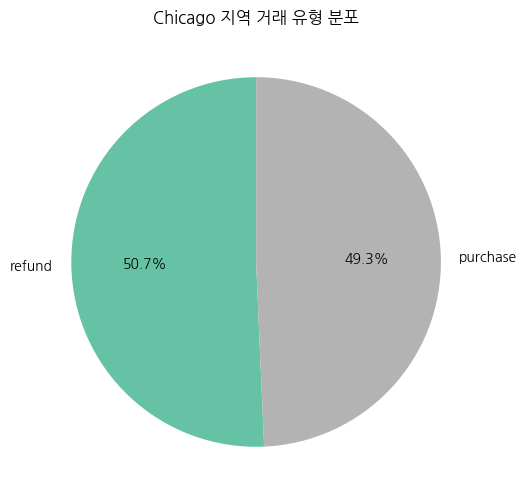

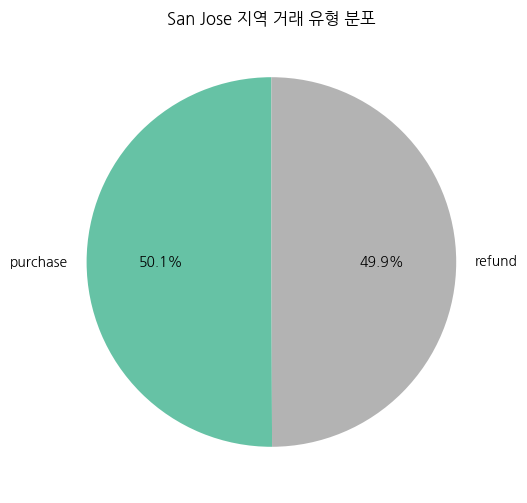

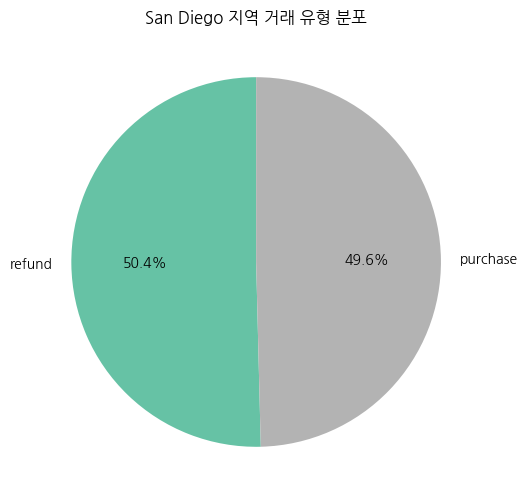

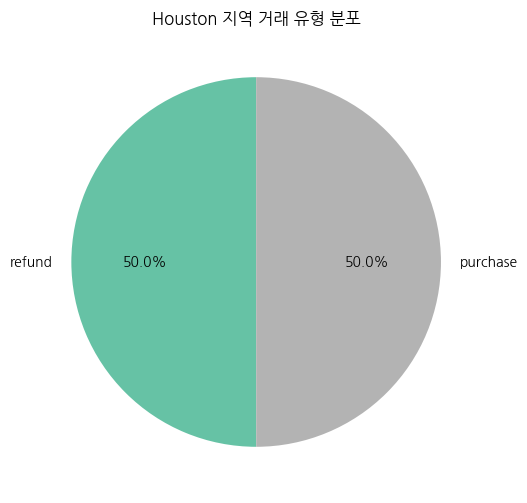

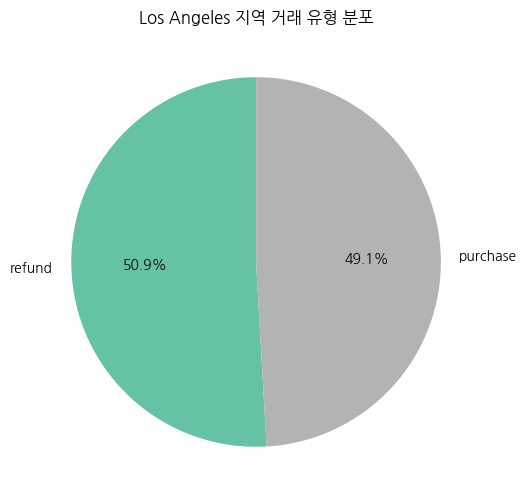

In [30]:
# 지역별 파이 차트 시각화
for location in df_fraud['Location'].unique():
    location_data = df_fraud[df_fraud['Location'] == location]
    transaction_counts = location_data['TransactionType'].value_counts()
    
    plt.figure(figsize=(6,6))
    transaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2')
    plt.title(f'{location} 지역 거래 유형 분포')
    plt.ylabel('')  # 라벨 제거
    plt.show()



전지역 refund가 50%대로 비슷비슷함

In [33]:


# 거래 유형 비율을 2x2 형태로 정리
observed = [transaction_counts.get('purchase', 0), transaction_counts.get('refund', 0)]

# 기대값 (귀무가설하에서 '구매'와 '환불'은 동일한 비율로 발생한다고 가정)
expected = [sum(observed) / 2, sum(observed) / 2]

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected_freq = chi2_contingency([observed, expected])

# 결과 출력
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")


Chi2 Stat: 0.026468569384679216, p-value: 0.8707612304307745


In [34]:
locations = df_fraud['Location'].unique()

for location in locations:
    location_data = df_fraud[df_fraud['Location'] == location]
    transaction_counts = location_data['TransactionType'].value_counts()
    
    observed = [transaction_counts.get('purchase', 0), transaction_counts.get('refund', 0)]
    expected = [sum(observed) / 2, sum(observed) / 2]
    
    chi2_stat, p_value, dof, expected_freq = chi2_contingency([observed, expected])
    
    print(f"Location: {location}, Chi2 Stat: {chi2_stat}, p-value: {p_value}")


Location: San Antonio, Chi2 Stat: 0.124230604874, p-value: 0.724490595621349
Location: Dallas, Chi2 Stat: 0.1447013952978199, p-value: 0.703651211728128
Location: New York, Chi2 Stat: 0.026468569384679216, p-value: 0.8707612304307745
Location: Philadelphia, Chi2 Stat: 1.0944105377028963, p-value: 0.29549603830978477
Location: Phoenix, Chi2 Stat: 0.5020211947904838, p-value: 0.4786133704983455
Location: Chicago, Chi2 Stat: 0.9478036066275041, p-value: 0.3302790011525592
Location: San Jose, Chi2 Stat: 0.0041305469396635194, p-value: 0.948755773067152
Location: San Diego, Chi2 Stat: 0.3086292223482039, p-value: 0.5785225698640625
Location: Houston, Chi2 Stat: 0.0, p-value: 1.0
Location: Los Angeles, Chi2 Stat: 1.5945350133528513, p-value: 0.2066794016799111


- 귀무가설
- 각 지역에서 발생하는 거래 유형은 비율에 차이가 없다.

In [35]:
# IQR을 이용한 이상치 탐지
Q1 = df_fraud['Amount'].quantile(0.25)  # 25% 분위수
Q3 = df_fraud['Amount'].quantile(0.75)  # 75% 분위수
IQR = Q3 - Q1  # IQR 계산

# 이상치 기준 설정 (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐지
outliers = df_fraud[(df_fraud['Amount'] < lower_bound) | (df_fraud['Amount'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")


이상치 개수: 0


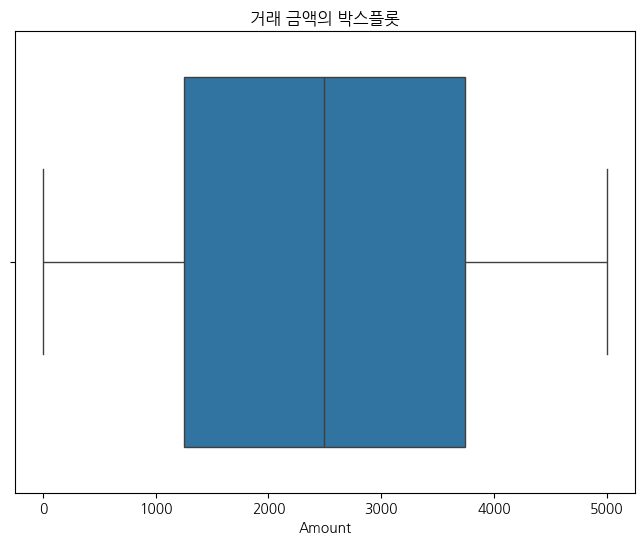

In [36]:
# 박스플롯을 이용한 이상치 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df_fraud['Amount'])
plt.title('거래 금액의 박스플롯')
plt.show()


- 이상치가 0이라는 것은 해당 데이터에서 극단적인 거래 금액(비정상적인 금액)이 없다는 점을 보여주며, 평균적인 거래 금액이 안정적인 범위 내에서 이루어지고 있다는 뜻

In [37]:
# 거래 시간대 범주화
df_fraud['TimeCategory'] = pd.cut(df_fraud['TransactionDate'].dt.hour, bins=[-1, 5, 11, 17, 23], 
                                   labels=['새벽', '오전', '오후', '저녁'])

# 시간대별 사기 거래 비율 계산
fraud_by_time = df_fraud.groupby('TimeCategory')['IsFraud'].mean()
print(fraud_by_time)


TimeCategory
새벽    0.010689
오전    0.010700
오후    0.008696
저녁    0.009920
Name: IsFraud, dtype: float64


/tmp/ipykernel_72896/4150177966.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_time = df_fraud.groupby('TimeCategory')['IsFraud'].mean()
